In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
pip install GDAL

In [3]:
pip install xlwt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.0/100.0 kB 4.0 MB/s eta 0:00:00


In [4]:
import os
from osgeo import gdal
import numpy as np

# 4 ch to RGB


In [11]:
from osgeo import gdal
import os
import numpy as np

def extract_rgb_channels(input_path, output_path):
    # Buka citra menggunakan GDAL
    dataset = gdal.Open(input_path)

    if dataset is None:
        raise Exception(f"Failed to open file: {input_path}")

    # Baca data citra
    width = dataset.RasterXSize
    height = dataset.RasterYSize
    bands = dataset.RasterCount

    # Pilih channel RGB (misalnya, channel 1, 2, dan 3)
    rgb_data = []
    for band_num in range(1, 4):
        band = dataset.GetRasterBand(band_num)
        band_data = band.ReadAsArray(0, 0, width, height)
        rgb_data.append(band_data)

    # Konversi data ke format NumPy
    rgb_image = np.stack(rgb_data, axis=-1)

    # Simpan citra RGB menggunakan GDAL di path output yang berbeda
    driver = gdal.GetDriverByName("GTiff")
    output_dataset = driver.Create(output_path, width, height, 3, gdal.GDT_Byte)

    for band_num in range(3):
        output_band = output_dataset.GetRasterBand(band_num + 1)
        output_band.WriteArray(rgb_image[:, :, band_num])

    # Tutup dataset
    dataset = None
    output_dataset = None

# Path ke direktori dengan citra-citra satelit (format TIFF)
input_directory = '/content/drive/MyDrive/Faiz/Padi/image'
output_directory = '/content/drive/MyDrive/Faiz/Padi/rgb'

# Loop melalui setiap citra di direktori
for filename in os.listdir(input_directory):
    if filename.endswith(".tif") or filename.endswith(".tiff"):
        input_path = os.path.join(input_directory, filename)

        # Generate nama file output
        output_filename = filename.replace('.', '.')
        output_path = os.path.join(output_directory, output_filename)

        # Ekstrak channel RGB dan simpan citra di path output yang berbeda
        extract_rgb_channels(input_path, output_path)

        print(f"Proses selesai untuk: {filename}")

Proses selesai untuk: data (38).tif
Proses selesai untuk: data (72).tif
Proses selesai untuk: data (21).tif
Proses selesai untuk: data (24).tif
Proses selesai untuk: data (27).tif
Proses selesai untuk: data (42).tif
Proses selesai untuk: data (17).tif
Proses selesai untuk: data (46).tif
Proses selesai untuk: data (67).tif
Proses selesai untuk: data (41).tif
Proses selesai untuk: data (53).tif
Proses selesai untuk: data (15).tif
Proses selesai untuk: data (30).tif
Proses selesai untuk: data (14).tif
Proses selesai untuk: data (28).tif
Proses selesai untuk: data (36).tif
Proses selesai untuk: data (47).tif
Proses selesai untuk: data (12).tif
Proses selesai untuk: data (20).tif
Proses selesai untuk: data (61).tif
Proses selesai untuk: data (48).tif
Proses selesai untuk: data (54).tif
Proses selesai untuk: data (11).tif
Proses selesai untuk: data (65).tif
Proses selesai untuk: data (16).tif
Proses selesai untuk: data (10).tif
Proses selesai untuk: data (70).tif
Proses selesai untuk: data (

In [14]:
import numpy as np
import os
from PIL import Image

# Path ke folder yang berisi gambar-gambar satelit
folder_path = '/content/drive/MyDrive/Faiz/Padi/rgb/label'
save_folder_path = '/content/drive/MyDrive/Faiz/Padi/rgb/label_crop'

# Tentukan ukuran potongan
crop_size = 256

# Loop melalui setiap gambar
for filename in os.listdir(folder_path):
    # Load gambar
    image_path = os.path.join(folder_path, filename)
    image = np.array(Image.open(image_path))

    # Hitung jumlah potongan
    num_crops = image.shape[0] // crop_size

    # Buat list untuk menyimpan potongan gambar
    cropped_images = []

    # Loop untuk memotong gambar
    for i in range(num_crops):
        for j in range(num_crops):
            # Hitung indeks awal dan akhir untuk potongan gambar
            start_i = i * crop_size
            end_i = start_i + crop_size
            start_j = j * crop_size
            end_j = start_j + crop_size

            # Potong gambar dan tambahkan ke list
            cropped_image = image[start_i:end_i, start_j:end_j]
            cropped_images.append(cropped_image)

    # Convert list ke array NumPy
    cropped_images_array = np.array(cropped_images)

    # Simpan potongan gambar ke folder
    for idx, cropped_image in enumerate(cropped_images_array):
        save_path = os.path.join(save_folder_path, f"{filename.split('.')[0]}_{idx}.tif")
        Image.fromarray(cropped_image).save(save_path)

    print(f"Image {filename} cropped and saved.")

print("All images cropped and saved.")


Image image (11).tif cropped and saved.
Image image (1).tif cropped and saved.
Image image (12).tif cropped and saved.
Image image (10).tif cropped and saved.
Image image (20).tif cropped and saved.
Image image (19).tif cropped and saved.
Image image (2).tif cropped and saved.
Image image (13).tif cropped and saved.
Image image (18).tif cropped and saved.
Image image (16).tif cropped and saved.
Image image (15).tif cropped and saved.
Image image (14).tif cropped and saved.
Image image (17).tif cropped and saved.
Image image (21).tif cropped and saved.
Image image (23).tif cropped and saved.
Image image (9).tif cropped and saved.
Image image (8).tif cropped and saved.
Image image (53).tif cropped and saved.
Image image (54).tif cropped and saved.
Image image (55).tif cropped and saved.
Image image (52).tif cropped and saved.
Image image (50).tif cropped and saved.
Image image (51).tif cropped and saved.
Image image (7).tif cropped and saved.
Image image (56).tif cropped and saved.
Image

# Data proces

# **Read Data**

In [5]:
import numpy as np
import os
import random
from osgeo import gdal
import cv2

#  Get color dictionary
#  labelFolder Label folder, the reason why the folder is traversed is because a label may not contain all category colors
#  classNum Total number of categories (including background)
def color_dict(labelFolder, classNum):
    colorDict = []
    #  Get the file name in the folder
    ImageNameList = os.listdir(labelFolder)
    for i in range(len(ImageNameList)):
        ImagePath = labelFolder + "/" + ImageNameList[i]
        img = cv2.imread(ImagePath).astype(np.uint32)
        #  If it is grayscale, convert it to RGB
        if(len(img.shape) == 2):
            img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB).astype(np.uint32)
        #  In order to extract unique values, convert RGB into a number
        img_new = img[:,:,0] * 1000000 + img[:,:,1] * 1000 + img[:,:,2]
        unique = np.unique(img_new)
        #  Add the unique value of the i-th pixel matrix to the colorDict
        for j in range(unique.shape[0]):
            colorDict.append(unique[j])
        #  Get the unique value from the unique value in the current i pixel matrix
        colorDict = sorted(set(colorDict))
        #  If the number of unique values ​​is equal to the total number of classes (including background) ClassNum, stop traversing the remaining images
        if(len(colorDict) == classNum):
            break
    #  RGB dictionary that stores colors, used for rendering results when predicting
    colorDict_RGB = []
    for k in range(len(colorDict)):
        #  Add zeros to the left for results that do not reach nine digits.(eg:5,201,111->005,201,111)
        color = str(colorDict[k]).rjust(9, '0')
        #  The first 3 digits are R, the middle 3 digits are G, and the last 3 digits are B.
        color_RGB = [int(color[0 : 3]), int(color[3 : 6]), int(color[6 : 9])]
        colorDict_RGB.append(color_RGB)
    #  Convert to numpy format
    colorDict_RGB = np.array(colorDict_RGB)
    #  GRAY dictionary to store colors, used for onehot encoding during preprocessing
    colorDict_GRAY = colorDict_RGB.reshape((colorDict_RGB.shape[0], 1 ,colorDict_RGB.shape[1])).astype(np.uint8)
    colorDict_GRAY = cv2.cvtColor(colorDict_GRAY, cv2.COLOR_BGR2GRAY)
    return colorDict_RGB, colorDict_GRAY

# Read image pixel matrix
#  fileName image file name
#def readTif(fileName):
 #   dataset = gdal.Open(fileName)
    #if dataset is None:
     # raise Exception(f"Failed to open file: {fileName}")
  #  width = dataset.RasterXSize
   # height = dataset.RasterYSize
    #GdalImg_data = dataset.ReadAsArray(0, 0, width, height)
    #return GdalImg_data

import os
from os.path import exists

def readTif(fileName):
    # Convert backslashes to forward slashes
    fileName = fileName.replace('\\', '/')

    # Check if the file exists
    if not exists(fileName):
        raise FileNotFoundError(f"File not found: {fileName}")

    # Open the file
    dataset = gdal.Open(fileName)

    # Check if the dataset is valid
    if dataset is None:
        raise Exception(f"Failed to open file: {fileName}")

    width = dataset.RasterXSize
    height = dataset.RasterYSize
    GdalImg_data = dataset.ReadAsArray(0, 0, width, height)
    return GdalImg_data
    # ... rest of your code ...


#  Data preprocessing: image normalization + label onehot encoding
#  img image data
#  label data
#  classNum Total number of categories (including background)
#  colorDict_GRAY color dictionary
def dataPreprocess(img, label, classNum, colorDict_GRAY):
    # normalized
    img = img / 255.0
    for i in range(colorDict_GRAY.shape[0]):
        label[label == colorDict_GRAY[i][0]] = i
    #  Extend data thickness to classNum layer
    new_label = np.zeros(label.shape + (classNum,))
    #  Turn each type of flat label into a separate layer
    for i in range(classNum):
        new_label[label == i,i] = 1
    label = new_label
    return (img, label)

# Training data generator
# batch_size batch size
# train_image_path training image path
# train_label_path training label path
# classNum total number of categories (including background)
# colorDict_GRAY color dictionary
# resize_shape

def trainGenerator(batch_size, train_image_path, train_label_path, classNum, colorDict_GRAY, resize_shape):
    imageList = os.listdir(train_image_path)
    labelList = os.listdir(train_label_path)

    print("Total images found:", len(imageList))
    print("Total labels found:", len(labelList))

    img = readTif(os.path.join(train_image_path, imageList[0]))
    img = img.swapaxes(1, 0)
    img = img.swapaxes(1, 2)

    while True:
        img_generator = np.zeros((batch_size, img.shape[0], img.shape[1], img.shape[2]), np.uint8)
        label_generator = np.zeros((batch_size, img.shape[0], img.shape[1]), np.uint8)

        if resize_shape is not None:
            img_generator = np.zeros((batch_size, resize_shape[0], resize_shape[1], resize_shape[2]), np.uint8)
            label_generator = np.zeros((batch_size, resize_shape[0], resize_shape[1]), np.uint8)

        rand = random.randint(0, len(imageList) - batch_size)

        for j in range(batch_size):
            idx = rand + j
            if idx >= len(imageList):
                idx = np.random.randint(0, len(imageList) - 1)

            img = readTif(os.path.join(train_image_path, imageList[idx]))
            img = img.swapaxes(1, 0)
            img = img.swapaxes(1, 2)

            if resize_shape is not None:
                img = cv2.resize(img, (resize_shape[0], resize_shape[1]))

            img_generator[j] = img

            label = readTif(os.path.join(train_label_path, labelList[idx])).astype(np.uint8)

            if len(label.shape) == 3:
                label = label.swapaxes(1, 0)
                label = label.swapaxes(1, 2)
                label = cv2.cvtColor(label, cv2.COLOR_RGB2GRAY)

            if resize_shape is not None:
                label = cv2.resize(label, (resize_shape[0], resize_shape[1]))

            label_generator[j] = label

        img_generator, label_generator = dataPreprocess(img_generator, label_generator, classNum, colorDict_GRAY)
        yield (img_generator, label_generator)

# Test data generator
# test_iamge_path test data path
# resize_shape resize size
def testGenerator(test_iamge_path, resize_shape = None):
    imageList = os.listdir(test_iamge_path)
    for i in range(len(imageList)):
        img = readTif(test_iamge_path + "\\" + imageList[i])
        img = img.swapaxes(1, 0)
        img = img.swapaxes(1, 2)
        #  normalization
        img = img / 255.0
        if(resize_shape != None):
            #  Change image size to specific size
            img = cv2.resize(img, (resize_shape[0], resize_shape[1]))
        #  Expand the test image by one dimension to be consistent with the input [batch_size, img.shape] during training
        img = np.reshape(img, (1, ) + img.shape)
        yield img

# Save results
# test_image_path test data image path
# test_predict_path Test data image prediction result path
# model_predict prediction results of the model
# color_dict color dictionary

def saveResult(test_image_path, test_predict_path, model_predict, color_dict, output_size):
    imageList = os.listdir(test_image_path)
    for i, img in enumerate(model_predict):
        channel_max = np.argmax(img, axis = -1)
        img_out = np.uint8(color_dict[channel_max.astype(np.uint8)])
        # Modify the difference method to nearest neighbor difference
        img_out = cv2.resize(img_out, (output_size[0], output_size[1]), interpolation = cv2.INTER_NEAREST)
        # Save as lossless compressed png
        cv2.imwrite(test_predict_path + "\\" + imageList[i][:-4] + ".png", img_out)

In [6]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau,Callback
import matplotlib.pyplot as plt
import datetime,time
import xlwt
import os
import warnings
import tensorflow as tf

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)

'\nData set related parameters\n'

In [17]:
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau,Callback
import matplotlib.pyplot as plt
import datetime,time
import xlwt
import os
import warnings
import tensorflow as tf
tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
from keras.models import Model
from keras.layers import Input, BatchNormalization, Conv2D,  Dropout, concatenate, UpSampling2D,Dense
from keras.optimizers import Adam
from keras.layers import Activation,Reshape,Add,Concatenate,Lambda,multiply
from keras.layers import GlobalAveragePooling2D, GlobalMaxPooling2D,MaxPooling2D
import keras.backend as K
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.image import ssim

def activation(x, func='relu'):
    '''
    Activation layer.
    '''
    return Activation(func)(x)

#def ssim_loss(validation_image_path, validation_label_path):
 #   bce_loss = BinaryCrossentropy()(validation_image_path, validation_label_path)
  #  ssim_loss = 1 - tf.reduce_mean(ssim(validation_image_path, validation_label_path, max_val=1.0))
   # return bce_loss + ssim_loss

def unet(pretrained_weights = None, input_size = (256, 256, 3), classNum = 2, learning_rate = 1e-2):
    inputs = Input(input_size)
    #  Lapisan konvolusi 2D
    conv1 = BatchNormalization()(Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs))
    conv1 = BatchNormalization()(Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1))
    #  Pengumpulan maksimal untuk data spasial
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)
    conv2 = BatchNormalization()(Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1))
    conv2 = BatchNormalization()(Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2))

    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)
    conv3 = BatchNormalization()(Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2))
    conv3 = BatchNormalization()(Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3))

    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3)
    conv4 = BatchNormalization()(Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool3))
    conv4 = BatchNormalization()(Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4))
    #  Regularisasi dropout untuk mencegah overfitting
    drop4 = Dropout(0.5)(conv4)
    pool4 = MaxPooling2D(pool_size=(2, 2))(drop4)
    conv5 = BatchNormalization()(Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool4))
    conv5 = BatchNormalization()(Conv2D(1024, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5))
    drop5 = Dropout(0.5)(conv5)
    #  Konvolusi dilakukan setelah upsampling, yang setara dengan operasi konvolusi yang dialihkan.
    up6 = Conv2D(512, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(drop5))

    try:
        merge6 = concatenate([drop4,up6],axis = 3)
    except:
        merge6 = concatenate([drop4,up6], mode = 'concat', concat_axis = 3)
    conv6 = BatchNormalization()(Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge6))
    conv6 = BatchNormalization()(Conv2D(512, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv6))

    up7 = Conv2D(256, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv6))
    try:
        merge7 = concatenate([conv3,up7],axis = 3)
    except:
        merge7 = concatenate([conv3,up7], mode = 'concat', concat_axis = 3)
    conv7 = BatchNormalization()(Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge7))
    conv7 = BatchNormalization()(Conv2D(256, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv7))

    up8 = Conv2D(128, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv7))
    try:
        merge8 = concatenate([conv2,up8],axis = 3)
    except:
        merge8 = concatenate([conv2,up8],mode = 'concat', concat_axis = 3)
    conv8 = BatchNormalization()(Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge8))
    conv8 = BatchNormalization()(Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv8))

    up9 = Conv2D(64, 2, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(UpSampling2D(size = (2,2))(conv8))
    try:
        merge9 = concatenate([conv1,up9],axis = 3)
    except:
        merge9 = concatenate([conv1,up9],mode = 'concat', concat_axis = 3)
    conv9 = BatchNormalization()(Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(merge9))
    conv9 = BatchNormalization()(Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9))
    conv9 = Conv2D(2, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv9)
    conv10 = Conv2D(classNum, 1, activation = 'softmax')(conv9)

    model = Model(inputs = inputs, outputs = conv10)

    # Digunakan untuk mengonfigurasi model pelatihan (pengoptimal, fungsi tujuan, kriteria evaluasi model)

    model.compile(optimizer = Adam(lr = learning_rate), loss = 'binary_crossentropy', metrics = ['accuracy'])

    #model.compile(optimizer= Adam(lr = learning_rate), loss=ssim_loss, metrics=['accuracy'])

    #  Jika ada beban yang sudah dilatih sebelumnya
    if(pretrained_weights):
    	model.load_weights(pretrained_weights)
    return model

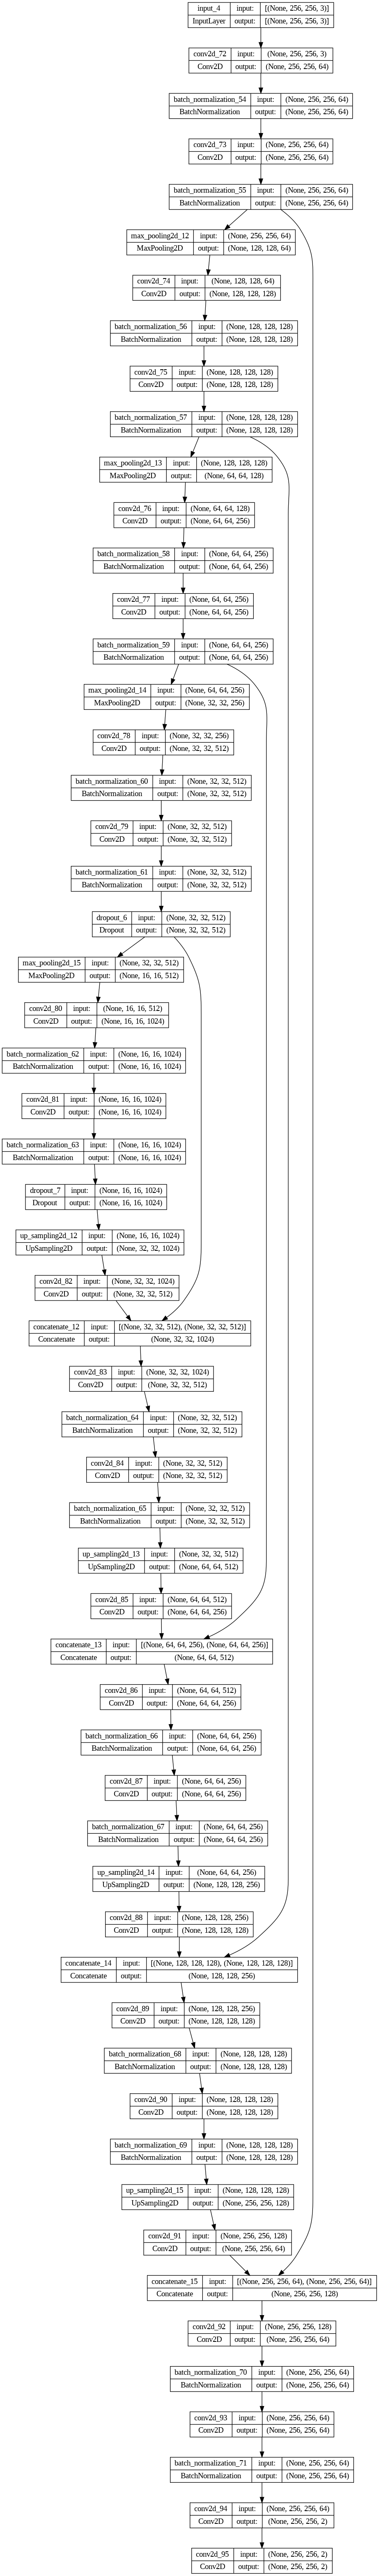

In [18]:
from tensorflow.keras.utils import plot_model
model= unet()
plot_model(model, show_shapes=True, show_layer_names=True)

# **Training**

Total images found: 785
Total labels found: 785
Epoch 1/30
Total images found: 336
Total labels found: 336

Epoch 1: loss improved from inf to 0.70429, saving model to /content/drive/MyDrive/Faiz/Padi/model/unet_model_data_duplicate.hdf5
98/98 - 203s - loss: 0.7043 - accuracy: 0.5624 - val_loss: 0.6798 - val_accuracy: 0.7560 - lr: 0.0010 - 203s/epoch - 2s/step
Epoch 2/30

Epoch 2: loss improved from 0.70429 to 0.67312, saving model to /content/drive/MyDrive/Faiz/Padi/model/unet_model_data_duplicate.hdf5
98/98 - 104s - loss: 0.6731 - accuracy: 0.7209 - val_loss: 0.6659 - val_accuracy: 0.7944 - lr: 0.0010 - 104s/epoch - 1s/step
Epoch 3/30

Epoch 3: loss improved from 0.67312 to 0.66292, saving model to /content/drive/MyDrive/Faiz/Padi/model/unet_model_data_duplicate.hdf5
98/98 - 93s - loss: 0.6629 - accuracy: 0.7654 - val_loss: 0.6559 - val_accuracy: 0.7635 - lr: 0.0010 - 93s/epoch - 943ms/step
Epoch 4/30

Epoch 4: loss improved from 0.66292 to 0.65369, saving model to /content/drive/MyD

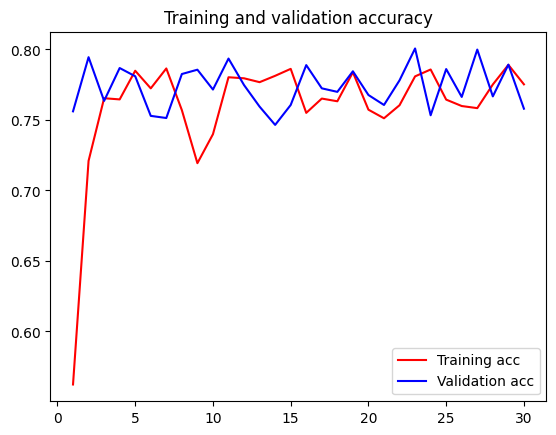

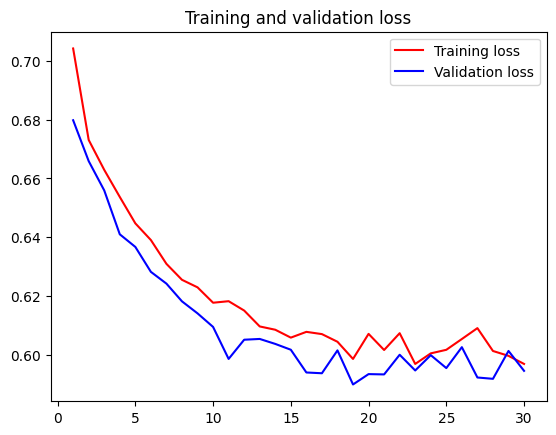

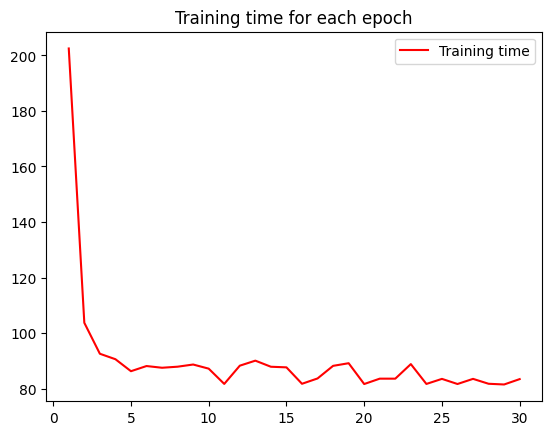

In [19]:
import os
import sys

from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau,Callback
import matplotlib.pyplot as plt
import datetime,time
import xlwt
import os
import warnings
import tensorflow as tf

warnings.filterwarnings('ignore')

tf.compat.v1.logging.set_verbosity(tf.compat.v1.logging.ERROR)
'''
Data set related parameters
'''

train_image_path = '/content/drive/MyDrive/Faiz/Padi/rgb/duplicate/training/images'

train_label_path = '/content/drive/MyDrive/Faiz/Padi/rgb/duplicate/training/masking'

validation_image_path = '/content/drive/MyDrive/Faiz/Padi/rgb/duplicate/validation/images'

validation_label_path = '/content/drive/MyDrive/Faiz/Padi/rgb/duplicate/validation/masking'

'''
Model related parameters
'''
# batch size
batch_size = 8
#  Number of classes (including background)
classNum = 2
# Model input image size
input_size = (256, 256, 3)
#  The total number of iterations for training the model
epochs = 30
#  Initial learning rate
learning_rate = 1e-3 #1e-4
#  Pre-trained model address
premodel_path = None
#  Training model storage address
model_path = "/content/drive/MyDrive/Faiz/Padi/model/unet_model_data_duplicate.hdf5"

# Number of training data
train_num = len(os.listdir(train_image_path))
# Number of verification data
validation_num = len(os.listdir(validation_image_path))
# How many epochs are there in the training set? batch_size
steps_per_epoch = train_num / batch_size
# How many epochs are there in the validation set? batch_size
validation_steps = validation_num / batch_size
# Label color dictionary, used for onehot encoding
colorDict_RGB, colorDict_GRAY = color_dict(train_label_path, classNum)


# Get a generator that generates training data at a rate of batch_size
train_Generator = trainGenerator(batch_size,
                                 train_image_path,
                                 train_label_path,
                                 classNum,
                                 colorDict_GRAY,
                                 input_size)

# Get a generator that generates validation data at a rate of batch_size
validation_data = trainGenerator(batch_size,
                                 validation_image_path,
                                 validation_label_path,
                                 classNum,
                                 colorDict_GRAY,
                                 input_size)
# Define model
model = unet(pretrained_weights=premodel_path,
             input_size=input_size,
             classNum=classNum,
             learning_rate=learning_rate)

early_stopping = EarlyStopping(monitor='val_loss', patience=20)

# When 5 epochs pass without val_loss decreasing, the learning rate is halved
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, verbose=1)

class TimeHistory(Callback):
    def on_train_begin(self, logs=None):
        self.time=[]
        self.traintime_start=time.time()
    def on_train_end(self, logs=None):
        self.traintime=time.time()-self.traintime_start
    def on_epoch_begin(self, epoch, logs=None):
        self.epochtime_start=time.time()
    def on_epoch_end(self, epoch, logs=None):
        self.time.append(time.time()-self.epochtime_start)

time_callback = TimeHistory()
model_checkpoint = ModelCheckpoint(model_path,
                                   monitor='loss',
                                   verbose=2,  # Log display mode: 0->quiet mode, 1->progress bar, 2->one line per round
                                   save_best_only=True)


#  Model training
history = model.fit_generator(train_Generator,
                              steps_per_epoch=steps_per_epoch,
                              epochs=epochs,
                              callbacks=[early_stopping, model_checkpoint, reduce_lr,time_callback],
                              validation_data=validation_data,
                              validation_steps=validation_steps,
                              verbose=2
                              )


log_time = "total training time: " + str(time_callback.traintime/ 60) + "m"
time = datetime.datetime.strftime(datetime.datetime.now(), '%Y%m%d-%H%M%S')
print(log_time)
with open('TrainTime_%s.txt' % time, 'w') as f:
    f.write(log_time)

#  Save and draw loss,acc
history.history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
book = xlwt.Workbook(encoding='utf-8', style_compression=0)
sheet = book.add_sheet('test', cell_overwrite_ok=True)
for i in range(len(acc)):
    sheet.write(i, 0, str(acc[i]))
    sheet.write(i, 1, str(val_acc[i]))
    sheet.write(i, 2, str(loss[i]))
    sheet.write(i, 3, str(val_loss[i]))
book.save(r'AccAndLoss_%s.xls' % time)
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig("accuracy_%s.png" % time, dpi=300)
plt.figure()
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig("loss_%s.png" % time, dpi=300)
plt.show()

plt.figure()
import numpy as np
plt.plot(epochs, np.array(time_callback.time), 'r', label='Training time')

plt.title('Training time for each epoch')
plt.legend()
plt.show()




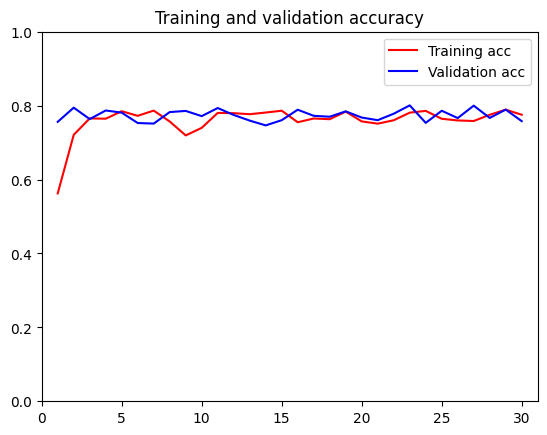

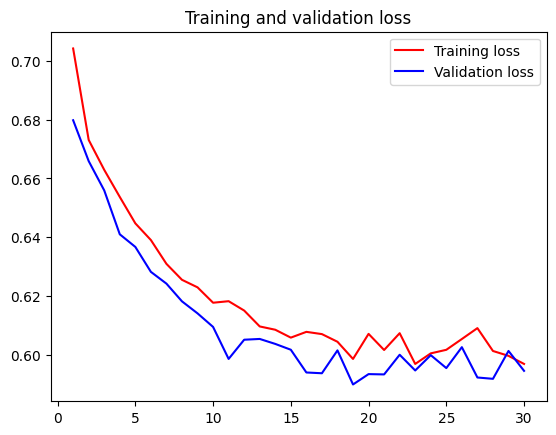

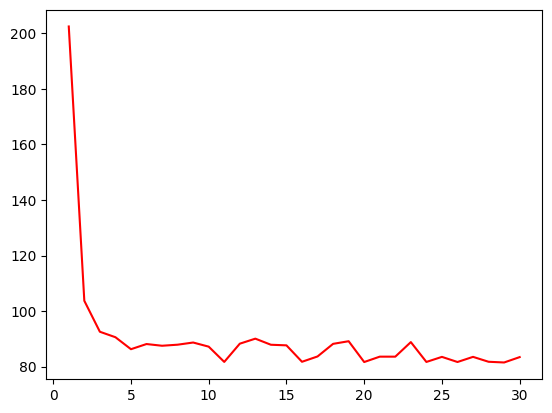

In [20]:
#  Save and draw loss,acc
history.history
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
book = xlwt.Workbook(encoding='utf-8', style_compression=0)
sheet = book.add_sheet('test', cell_overwrite_ok=True)
for i in range(len(acc)):
    sheet.write(i, 0, str(acc[i]))
    sheet.write(i, 1, str(val_acc[i]))
    sheet.write(i, 2, str(loss[i]))
    sheet.write(i, 3, str(val_loss[i]))
book.save(r'AccAndLoss_%s.xls' % time)
epochs = range(1, len(acc) + 1)
# Mengatur skala plot pada sumbu x dan y
plt.xlim([0, len(acc) + 1])  # Mengatur rentang sumbu x
plt.ylim([0, 1])             # Mengatur rentang sumbu y

# Plot training dan validation accuracy
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.savefig("accuracy_%s.png" % time, dpi=300)
plt.show()

# Plot training dan validation loss
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.savefig("loss_%s.png" % time, dpi=300)
plt.show()

plt.figure()
import numpy as np
plt.plot(epochs, np.array(time_callback.time), 'r', label='Training time')

# Predict

In [22]:
from osgeo import gdal
import numpy as np
from keras.models import load_model
from keras import losses
import datetime
import math,os
import sys

def readTif(fileName, xoff = 0, yoff = 0, data_width = 0, data_height = 0):
    dataset = gdal.Open(fileName)
    if dataset == None:
        print(fileName + "File cannot be opened")

    width = dataset.RasterXSize
    height = dataset.RasterYSize
    bands = dataset.RasterCount
    if(data_width == 0 and data_height == 0):
        data_width = width
        data_height = height
    data = dataset.ReadAsArray(xoff, yoff, data_width, data_height)
    geotrans = dataset.GetGeoTransform()
    proj = dataset.GetProjection()
    return width, height, bands, data, geotrans, proj

#  Save tif file function
def writeTiff(im_data, im_geotrans, im_proj, path):
    if 'int8' in im_data.dtype.name:
        datatype = gdal.GDT_Byte
    elif 'int16' in im_data.dtype.name:
        datatype = gdal.GDT_UInt16
    else:
        datatype = gdal.GDT_Float32
    if len(im_data.shape) == 3:
        im_bands, im_height, im_width = im_data.shape
    elif len(im_data.shape) == 2:
        im_data = np.array([im_data])
        im_bands, im_height, im_width = im_data.shape

    #Create a file
    path_compress=path
    path=path.replace('.tif','orig.tif')
    driver = gdal.GetDriverByName("GTiff")
    dataset = driver.Create(path, int(im_width), int(im_height), int(im_bands), datatype)
    if(dataset!= None):
        dataset.SetGeoTransform(im_geotrans) #Write affine transformation parameters
        dataset.SetProjection(im_proj) #Write projection
    for i in range(im_bands):
        dataset.GetRasterBand(i+1).WriteArray(im_data[i])
    del dataset
    compress(path,path_compress)

def compress(path, target_path,method="LZW"): #
    """Use gdal for file compression,
          The LZW (Lempel Ziv Welch) method is lossless compression and has better black and white image effects.
          """
    dataset = gdal.Open(path)
    driver = gdal.GetDriverByName('GTiff')
    driver.CreateCopy(target_path, dataset, strict=1, options=["TILED=YES", "COMPRESS={0}".format(method)])
    del dataset
    os.remove(path)


#  tif crop (tif pixel data, crop side length)
def TifCroppingArray(img, SideLength):
    #  Cut the linked list
    TifArrayReturn = []
    #  Number of image blocks on the column
    ColumnNum = int((img.shape[0] - SideLength * 2) / (256 - SideLength * 2))
    #  Number of image blocks on the line
    RowNum = int((img.shape[1] - SideLength * 2) / (256 - SideLength * 2))
    for i in range(ColumnNum):
        TifArray = []
        for j in range(RowNum):
            cropped = img[i * (256 - SideLength * 2) : i * (256 - SideLength * 2) + 256,
                          j * (256 - SideLength * 2) : j * (256 - SideLength * 2) + 256]
            TifArray.append(cropped)
        TifArrayReturn.append(TifArray)
    #  Considering that there will be remainders in the rows and columns, crop one row and one column forward.
    # Crop the last column forward
    for i in range(ColumnNum):
        cropped = img[i * (256 - SideLength * 2) : i * (256 - SideLength * 2) + 256,
                      (img.shape[1] - 256) : img.shape[1]]
        TifArrayReturn[i].append(cropped)
    #  Crop last row forward
    TifArray = []
    for j in range(RowNum):
        cropped = img[(img.shape[0] - 256) : img.shape[0],
                      j * (256-SideLength*2) : j * (256 - SideLength * 2) + 256]
        TifArray.append(cropped)
    #  Crop lower right corner forward
    cropped = img[(img.shape[0] - 256) : img.shape[0],
                  (img.shape[1] - 256) : img.shape[1]]
    TifArray.append(cropped)
    TifArrayReturn.append(TifArray)
    #  remaining number on column
    ColumnOver = (img.shape[0] - SideLength * 2) % (256 - SideLength * 2) + SideLength
    #  remaining number on the line
    RowOver = (img.shape[1] - SideLength * 2) % (256 - SideLength * 2) + SideLength
    return TifArrayReturn, RowOver, ColumnOver

#  Label visualization, that is, assigning n values ​​to the nth category
def labelVisualize(img):
    img_out = np.zeros((img.shape[0],img.shape[1]))
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            #  Assign n value to nth class
            img_out[i][j] = np.argmax(img[i][j])
    return img_out

#  Normalize the test image and make its dimensions consistent with the training image
def testGenerator(TifArray):
    for i in range(len(TifArray)):
        for j in range(len(TifArray[0])):
            img = TifArray[i][j]
            #  归一化
            img = img / 255.0
            #  Change the shape without changing the data content
            img = np.reshape(img,(1,)+img.shape)
            yield img

#  Get the result matrix
def Result(shape, TifArray, npyfile, num_class, RepetitiveLength, RowOver, ColumnOver):
    result = np.zeros(shape, np.uint8)
    #  j to mark the number of rows
    j = 0
    for i,item in enumerate(npyfile):
        img = labelVisualize(item)
        img = img.astype(np.uint8)
        #  Special consideration is given to the leftmost column. The left edge must be spliced ​​in.
        if(i % len(TifArray[0]) == 0):
            # The first row needs special consideration, and the upper edge needs to be taken into account.
            if(j == 0):
                result[0 : 256 - RepetitiveLength, 0 : 256-RepetitiveLength] = img[0 : 256 - RepetitiveLength, 0 : 256 - RepetitiveLength]
            #The last line needs special consideration, and the lower edge needs to be taken into account.
            elif(j == len(TifArray) - 1):

                result[shape[0] - ColumnOver - RepetitiveLength: shape[0], 0 : 256 - RepetitiveLength] = img[256 - ColumnOver - RepetitiveLength : 256, 0 : 256 - RepetitiveLength]
            else:
                result[j * (256 - 2 * RepetitiveLength) + RepetitiveLength : (j + 1) * (256 - 2 * RepetitiveLength) + RepetitiveLength,
                       0:256-RepetitiveLength] = img[RepetitiveLength : 256 - RepetitiveLength, 0 : 256 - RepetitiveLength]
        #  Special considerations in the rightmost column，The right edge needs to be spliced ​​in
        elif(i % len(TifArray[0]) == len(TifArray[0]) - 1):
            #  The first line needs special consideration，The upper edge must be taken into account
            if(j == 0):
                result[0 : 256 - RepetitiveLength, shape[1] - RowOver: shape[1]] = img[0 : 256 - RepetitiveLength, 256 -  RowOver: 256]
            #  The last line needs special consideration，The lower edge needs to be taken into consideration
            elif(j == len(TifArray) - 1):
                result[shape[0] - ColumnOver : shape[0], shape[1] - RowOver : shape[1]] = img[256 - ColumnOver : 256, 256 - RowOver : 256]
            else:
                result[j * (256 - 2 * RepetitiveLength) + RepetitiveLength : (j + 1) * (256 - 2 * RepetitiveLength) + RepetitiveLength,
                       shape[1] - RowOver : shape[1]] = img[RepetitiveLength : 256 - RepetitiveLength, 256 - RowOver : 256]
            #  Go to the far right of each row，Number of lines +1
            j = j + 1
        #  Neither the far left nor the far right
        else:
            #  Special consideration should be given to the first line，The upper edge must be taken into account
            if(j == 0):
                result[0 : 256 - RepetitiveLength,
                       (i - j * len(TifArray[0])) * (256 - 2 * RepetitiveLength) + RepetitiveLength : (i - j * len(TifArray[0]) + 1) * (256 - 2 * RepetitiveLength) + RepetitiveLength
                       ] = img[0 : 256 - RepetitiveLength, RepetitiveLength : 256 - RepetitiveLength]
            #  Special consideration should be given to the last line，The lower edge needs to be taken into consideration
            if(j == len(TifArray) - 1):
                result[shape[0] - ColumnOver : shape[0],
                       (i - j * len(TifArray[0])) * (256 - 2 * RepetitiveLength) + RepetitiveLength : (i - j * len(TifArray[0]) + 1) * (256 - 2 * RepetitiveLength) + RepetitiveLength
                       ] = img[256 - ColumnOver : 256, RepetitiveLength : 256 - RepetitiveLength]
            else:
                result[j * (256 - 2 * RepetitiveLength) + RepetitiveLength : (j + 1) * (256 - 2 * RepetitiveLength) + RepetitiveLength,
                       (i - j * len(TifArray[0])) * (256 - 2 * RepetitiveLength) + RepetitiveLength : (i - j * len(TifArray[0]) + 1) * (256 - 2 * RepetitiveLength) + RepetitiveLength,
                       ] = img[RepetitiveLength : 256 - RepetitiveLength, RepetitiveLength : 256 - RepetitiveLength]
    return result

def predict(TifPath,ResultPath):
    #  Get current time
    model = load_model(ModelPath)
    print("\r", end="")

    files=os.listdir(TifPath)
    for i,file in enumerate(files):
        im_width, im_height, im_bands, im_data, im_geotrans, im_proj = readTif(os.path.join(TifPath,file))
        im_data = im_data.swapaxes(1, 0)
        im_data = im_data.swapaxes(1, 2)

        TifArray, RowOver, ColumnOver = TifCroppingArray(im_data, RepetitiveLength)
        testGene = testGenerator(TifArray)
        results = model.predict_generator(testGene,
                                          len(TifArray) * len(TifArray[0]),
                                          verbose = 0)
        #Save results
        result_shape = (im_data.shape[0], im_data.shape[1])
        result_data = Result(result_shape, TifArray, results, 2, RepetitiveLength, RowOver, ColumnOver)
        #Get colorbar
        img_color = np.uint8(colorDict_RGB[result_data.astype(np.uint8)])
        img_color=np.transpose(img_color,[2,0,1])

        writeTiff(img_color, im_geotrans, im_proj, os.path.join(ResultPath,file))
        print("\r", end="")
        print("Predict progress: {}%: ".format(int((i+1)/len(files)*100)), "▋" * (i+1), end="")
        sys.stdout.flush()

#Overlap area parameter
area_perc = 0.6
#  Count background class
classNum=2
#  Training model storage address
ModelPath = '/content/drive/MyDrive/Faiz/Padi/model/unet_model_3.hdf5'
#  test data path
TifPath = '/content/drive/MyDrive/Faiz/Padi/test/map'
#  Results save path
ResultPath = '/content/drive/MyDrive/Faiz/Padi/predict/predict_map/'
train_label_path= '/content/drive/MyDrive/Faiz/Padi/rgb/duplicate/training/masking'

RepetitiveLength = int((1 - math.sqrt(area_perc)) * 256 / 2)
colorDict_RGB, colorDict_GRAY = color_dict(train_label_path, classNum)
predict(TifPath,ResultPath)

Predict progress: 100%:  ▋